In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import yaml

    

In [2]:
def read_csv(dataset,type_simclr,n_transformations,percentage):
    try:
        
        data = pd.read_csv(f'experiments/simclr_all/{type_simclr}/{dataset}/{type_simclr}_{n_transformations}T_{dataset}_P{percentage}/data.csv')
        data.loc[data['score'] < 0,'score'] = 0
    except:
        print(f'experiments/simclr_all/{type_simclr}/{dataset}/{type_simclr}_{n_transformations}T_{dataset}_P{percentage}/data.csv')
        data = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    return data

def get_no_reducer_score(dataset):
    with open(f'TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score = yaml.load(f, Loader=yaml.FullLoader)
        score = score['score']
        #print(score)
    return score

In [3]:
dataset_default = 'motionsense'
type_simclr_default='simclr_full'
percentage_default=100
n_transformations_default=2
data=read_csv(dataset_default,type_simclr_default,n_transformations_default,percentage_default)
score_no_reducer=get_no_reducer_score(dataset_default)
score_no_reducer

0.785952380952381

In [4]:
data

,Unnamed: 0,score,randomforest-100-accuracy (mean),randomforest-100-accuracy (std),randomforest-100-f1-score macro (mean),randomforest-100-f1-score macro (std),randomforest-100-f1-score weighted (mean),randomforest-100-f1-score weighted (std),KNN-5-accuracy (mean),KNN-5-accuracy (std),...,hostname,node_ip,time_since_restore,iterations_since_restore,checkpoint_dir_name,config/temperature_head,config/latent_dim,config/batch_size,config/transform_funcs,logdir
0,0,0.817857,0.817857,0.005351,0.822601,0.004978,0.822601,0.004978,0.816667,0.0,...,6758e5a243b0,172.17.0.4,31.406437,1,NaN,0.9,87,157,"(6, 11)",d25b0ca5
1,1,0.808571,0.808571,0.004286,0.812175,0.004254,0.812175,0.004254,0.771429,0.0,...,6758e5a243b0,172.17.0.4,24.801843,1,NaN,0.5,120,451,"(4, 11)",149d40bd
2,2,0.811905,0.810000,0.006547,0.812330,0.006433,0.812330,0.006433,0.811905,0.0,...,6758e5a243b0,172.17.0.4,46.354423,1,NaN,0.8,232,298,"(9, 10)",234dd5b8
3,3,0.803095,0.803095,0.005933,0.806419,0.006149,0.806419,0.006149,0.783333,0.0,...,6758e5a243b0,172.17.0.4,38.106040,1,NaN,0.6,187,301,"(3, 6)",706b5138
4,4,0.752381,0.751905,0.003810,0.758125,0.003697,0.758125,0.003697,0.752381,0.0,...,6758e5a243b0,172.17.0.4,15.886814,1,NaN,0.9,4,260,"(2, 4)",2025f18d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,1061,0.832857,0.832857,0.006371,0.836405,0.006145,0.836405,0.006145,0.830952,0.0,...,6758e5a243b0,172.17.0.4,31.565620,1,NaN,0.2,108,268,"(1, 6)",01a7ba04
1062,1062,0.842381,0.842381,0.005084,0.845787,0.004882,0.845787,0.004882,0.800000,0.0,...,6758e5a243b0,172.17.0.4,38.337787,1,NaN,0.1,92,261,"(0, 5)",d9be199e
1063,1063,0.838810,0.838810,0.005933,0.842229,0.005859,0.842229,0.005859,0.809524,0.0,...,6758e5a243b0,172.17.0.4,36.164103,1,NaN,0.1,75,248,"(6, 8)",52e720c4
1064,1064,0.799048,0.799048,0.004903,0.805309,0.004645,0.805309,0.004645,0.783333,0.0,...,6758e5a243b0,172.17.0.4,34.058775,1,NaN,0.2,99,315,"(2, 5)",566628ab


In [5]:
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
transformations = ['1', '2', '3', '4']
percentages = [25, 50, 75, 100, 200]
type_simclr_options=['simclr_full','simclr_linear','simclr']


In [6]:
import plotly.express as px
import plotly.graph_objects as go
best_transformation={}
def plot_best_score(dataset, type_simclr):
    fig = go.Figure() 

    for percentage in percentages:
        best_scores = []  
        
        max_score = -1  
        for i, n_transformations in enumerate(transformations):
            data = read_csv(dataset, type_simclr, n_transformations, percentage)
            score_no_reducer = get_no_reducer_score(dataset)                
            max_dataset_score = data['score'].max()
            
            if max_dataset_score > max_score:
                max_score = max_dataset_score 
                max_dataset_score_ = data['score'].cummax()
                n_transformations_ = n_transformations
                
            best_scores.append(max_score)
        #best_transformation[percentage]=n_transformations_

        fig.add_trace(go.Scatter(x=max_dataset_score_.index, y=max_dataset_score_, mode='lines', name=f': {percentage}% {n_transformations_} T'))

    fig.add_trace(go.Scatter(x=max_dataset_score_.index, y=[score_no_reducer] * len(max_dataset_score_), mode='lines', line=dict(dash='dash'), name='No reducer'))

    fig.update_layout(
        title=f'{dataset} Best Scores for Different Transformations',
        xaxis_title='Iterations',
        yaxis_title='Best accuracy',
        showlegend=True
    )

    fig.show()
interact(plot_best_score, dataset=widgets.Dropdown(options=datasets, value=dataset_default), type_simclr=widgets.Dropdown(options=type_simclr_options, value=type_simclr_default))


interactive(children=(Dropdown(description='dataset', index=1, options=('kuhar', 'motionsense', 'uci', 'wisdm'…

<function __main__.plot_best_score(dataset, type_simclr)>

In [7]:
best_transformation

{}

In [8]:

def update_hyperparameters_plot(dataset, type_simclr, transformation, percentage):
    data = read_csv(dataset, type_simclr, transformation, percentage)
    score_no_reducer=get_no_reducer_score(dataset)
    fig = px.scatter(data, x='Unnamed: 0', y='score', title=f'{dataset} - hyperparameters exploration', labels={'score': 'Scores'})
    fig.update_xaxes(title_text='', showticklabels=False)
    fig.update_yaxes(title_text='', showticklabels=False)
    fig.add_scatter(x=data['Unnamed: 0'], y=data['score'].cummax(), mode='lines', line=dict(color='blue', width=4), name='MAX (KNN, SVC, RF)')
    fig.add_scatter(x=data['Unnamed: 0'], y=[score_no_reducer] * len(data), mode='lines', line=dict(color='red', width=4), name='No reducer')
    fig.update_traces(marker=dict(size=4), selector=dict(mode='markers'))

    fig.show()


# Crear widget interactivo
interact(update_hyperparameters_plot, dataset=widgets.Dropdown(options=datasets, value=dataset_default), type_simclr=widgets.Dropdown(options=type_simclr_options, value=type_simclr_default), transformation=widgets.Dropdown(options=transformations, value=transformations[0]), percentage=widgets.Dropdown(options=percentages, value=percentages[0]))


interactive(children=(Dropdown(description='dataset', index=1, options=('kuhar', 'motionsense', 'uci', 'wisdm'…

<function __main__.update_hyperparameters_plot(dataset, type_simclr, transformation, percentage)>

In [9]:
def get_perc(fig,axs,dataset,percentage,type_simclr,indice_plot,n_transformations):
    
    data=read_csv(dataset,type_simclr,n_transformations,percentage)
    score_no_reducer=get_no_reducer_score(dataset)
    axs[indice_plot].set_title(f'Up to  {percentage}% of orig. dim.')
    axs[indice_plot].plot(data['Unnamed: 0'], data['score'], '.', color='lightgray', label='scores')
    axs[indice_plot].plot(data['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[indice_plot].plot(data['Unnamed: 0'], [score_no_reducer]*len(data), color='red', label='No reducer')
    axs[indice_plot].legend(loc='lower center')
    axs[indice_plot].set_ylabel(f'Best accuracy on {dataset}_{n_transformations}T')
    axs[0].grid()

def plot_all_perc(dataset,type_simclr):
    plot_per=True
    for i, transf in enumerate(transformations):
        fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    
        # Subplots for each dataset
        for j, percentage in enumerate(percentages):
            get_perc(fig,axs,dataset,percentage,type_simclr,j,transf)

interact(plot_all_perc, dataset=widgets.Dropdown(options=datasets, value=dataset_default), type_simclr=widgets.Dropdown(options=type_simclr_options, value=type_simclr_default))


interactive(children=(Dropdown(description='dataset', index=1, options=('kuhar', 'motionsense', 'uci', 'wisdm'…

<function __main__.plot_all_perc(dataset, type_simclr)>

In [10]:
def plot_best_acc_by_transf(dataset,type_simclr):
    colors = ['green', 'blue', 'orange', 'gray', 'purple', 'brown']
    best_score_all={}
    
    for i, n_transformations in enumerate(transformations):
        best_score_all[n_transformations]=[]
        for percentage in percentages:
            data=read_csv(dataset,type_simclr,n_transformations,percentage)
            score_no_reducer=get_no_reducer_score(dataset)
            best_score_all[n_transformations].append(data['score'].max())
            plt.plot(data['score'].cummax(), label=f'Percentage: {percentage}%')
            plt.plot(data['Unnamed: 0'], [score_no_reducer]*len(data['Unnamed: 0']), '--',color='red', label='No reducer')
        
        
        plt.title(f'{dataset}_{n_transformations}T - hyperparameters exploration')
        plt.ylabel('Best accuracy')
        plt.xlabel('Iterations')
        plt.legend()
        plt.grid()
        plt.show()
    

interact(plot_best_acc_by_transf, dataset=widgets.Dropdown(options=datasets, value=dataset_default), type_simclr=widgets.Dropdown(options=type_simclr_options, value=type_simclr_default))


interactive(children=(Dropdown(description='dataset', index=1, options=('kuhar', 'motionsense', 'uci', 'wisdm'…

<function __main__.plot_best_acc_by_transf(dataset, type_simclr)>

In [11]:
def plot_best_score(dataset,type_simclr):
    for percentage in percentages:
        best_scores = []  
        max_score = -1  # Initialize with a negative value to ensure any score is an improvement

        for i, n_transformations in enumerate(transformations):
            data=read_csv(dataset,type_simclr,n_transformations,percentage)
            score_no_reducer=get_no_reducer_score(dataset)                
            max_dataset_score = data['score'].max()
            
            if max_dataset_score > max_score:
                max_score = max_dataset_score 
                max_dataset_score_=data['score'].cummax()
                n_transformations_=n_transformations
                
                
            best_scores.append(max_score)        
        plt.plot(max_dataset_score_, label=f'Percentage: {percentage}% {n_transformations_}')
    
    
    plt.plot( [score_no_reducer] * len(max_dataset_score_), '--', color='red', label='No reducer')
    plt.title(f'{dataset} Best Scores for Different Transformations')
    plt.ylabel('Best accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    plt.show()

interact(plot_best_score, dataset=widgets.Dropdown(options=datasets, value=dataset_default), type_simclr=widgets.Dropdown(options=type_simclr_options, value=type_simclr_default))


interactive(children=(Dropdown(description='dataset', index=1, options=('kuhar', 'motionsense', 'uci', 'wisdm'…

<function __main__.plot_best_score(dataset, type_simclr)>

In [12]:
def plot_by_percentage(dataset,type_simclr):
    colors = ['darkgreen', 'blue', 'orange', 'red', 'lightgreen', 'brown']
    for i, n_transformations in enumerate(transformations):
        best_scores = []
        for percentage in percentages:
            try:
                data=read_csv(dataset,type_simclr,n_transformations,percentage)
                score_no_reducer=get_no_reducer_score(dataset)
                best_scores.append(data['score'].max())
            except:
                best_scores.append(0)
        plt.plot(percentages, best_scores, 'x', color=colors[i])
        plt.plot(percentages, best_scores, '-', label=f'{n_transformations}T', color=colors[i])
        
    
    plt.plot(percentages, [score_no_reducer]*len(percentages), '--', color=colors[i])
    plt.plot(np.NaN, np.NaN, '--', color=[0, 0, 0], label='No reducer' )
    
    plt.title(f'SIMCLR -{dataset} Hyperparameters exploration in percentage of original dimensionality')
    plt.ylabel('Best accuracy')
    plt.xlabel('Percentages of original dimensionality')
    plt.legend(bbox_to_anchor=(1.0, 0.5), fancybox=True, shadow=True, ncol=1, title='Datasets')
    plt.grid()
    plt.show()

interact(plot_by_percentage, dataset=widgets.Dropdown(options=datasets, value=dataset_default), type_simclr=widgets.Dropdown(options=type_simclr_options, value=type_simclr_default))


interactive(children=(Dropdown(description='dataset', index=1, options=('kuhar', 'motionsense', 'uci', 'wisdm'…

<function __main__.plot_by_percentage(dataset, type_simclr)>

In [13]:
import plotly.graph_objects as go
import pandas as pd

def plot_bar(dataset,type_simclr):
    best_scores = []
    
    for n_transformations in transformations:
        scores = []
        for percentage in percentages:
            try:
                data=read_csv(dataset,type_simclr,n_transformations,percentage)
                score_no_reducer=get_no_reducer_score(dataset)        
                data = data.loc[data['score'] > 0]
                scores.append(data['score'].max())
                

            except:
                scores.append(0)
        
        best_scores.append(scores)
    
    data = []
    for i, p in enumerate(percentages):
        scores_for_percentage = [scores[i] for scores in best_scores]
        trace = go.Bar(
            x=transformations,
            y=scores_for_percentage,
            name=f'Percentage: {p}%'
        )
        data.append(trace)
    
    print(best_scores)
    layout = go.Layout(
        title='Comparison of Transformations by Percentage',
        xaxis=dict(title='Transformation'),
        yaxis=dict(title='Best Score'),
        barmode='group'  
    )
    
    fig = go.Figure(data=data, layout=layout)
    fig.show()

interact(plot_bar, dataset=widgets.Dropdown(options=datasets, value=dataset_default), type_simclr=widgets.Dropdown(options=type_simclr_options, value=type_simclr_default))


interactive(children=(Dropdown(description='dataset', index=1, options=('kuhar', 'motionsense', 'uci', 'wisdm'…

<function __main__.plot_bar(dataset, type_simclr)>

In [14]:
import plotly.express as px
import pandas as pd

configs=['latent_dim','temperature_head','batch_size']
def plot_config_paramenters(dataset,type_simclr,config_val,n_transformations,percentage):
    data=read_csv(dataset,type_simclr,n_transformations,percentage)
    score_no_reducer=get_no_reducer_score(dataset)  
    x=f'config/{config_val}'
    y='score'
    fig = px.box(data, x=x, y=y)
    fig.update_layout(xaxis_title=x,yaxis_title=y,
            title=f'{dataset} Box Plot of Scores for {x}(Transformation: {n_transformations}, Percentage: {percentage}%)'
                )
    fig.show()



interact(plot_config_paramenters, dataset=widgets.Dropdown(options=datasets, value=dataset_default), type_simclr=widgets.Dropdown(options=type_simclr_options, value=type_simclr_default),config_val=widgets.Dropdown(options=configs, value=configs[0]),n_transformations=widgets.Dropdown(options=transformations, value=transformations[0]), percentage=widgets.Dropdown(options=percentages, value=percentages[0]))


interactive(children=(Dropdown(description='dataset', index=1, options=('kuhar', 'motionsense', 'uci', 'wisdm'…

<function __main__.plot_config_paramenters(dataset, type_simclr, config_val, n_transformations, percentage)>

In [22]:
def fixed_percentage(
        datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'],
        models=['simcrl_full','SimCLR_linear','simclr'],
        markers = ['d', 's', 'p', 'h', 'o'],
        percentages=[25, 50, 75, 100, 200],
        colors = ['blue', 'orange', 'lightgreen', 'darkgreen', 'purple'],
        y_lim = [0, 1],
        n_transformations=3
        ):
    """
    Plots the best accuracy for each model and dataset for a fixed percentage of the dataset.
    """
    for dataset in datasets:
        with open(f'TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
            no_reducer_score = yaml.load(f, Loader=yaml.FullLoader)
            no_reducer_score = no_reducer_score['score']
        
        for i, percentage in enumerate(percentages):
            # Subplots for each dataset
            fig, axs = plt.subplots(1, 2, figsize=(15, 8))
            plt.suptitle(f'Up to {percentage}% on {dataset}')
            max_length = 0
            for j, model in enumerate(models):
                try:
                    data = read_csv(dataset, model, n_transformations, percentage)


                
                except:
                    data = pd.DataFrame({'Unnamed: 0': [], 'score': []})
                max_index = data['Unnamed: 0'].max()
                if  max_index > max_length:
                    max_length = max_index
                axs[0].plot(data['Unnamed: 0'], data['score'], markers[j], color=colors[j], markersize=4, label=model)
                axs[1].plot(data['score'].cummax(), color=colors[j], linewidth=2, label=model)
            axs[0].plot([0, max_length], [no_reducer_score, no_reducer_score], color='red', linewidth=2, label='No reducer')
            axs[0].legend(loc='lower center')
            axs[0].set_ylabel(f'Best accuracy')
            axs[0].set_xlabel('Iterations')
            axs[0].grid()
            axs[0].set_ylim(y_lim)
            axs[0].set_facecolor('#e6f5c9')
            axs[1].plot([0, max_length], [no_reducer_score, no_reducer_score], color='red', linewidth=2, label='No reducer')
            axs[1].legend(loc='lower center')
            axs[1].set_ylabel(f'Best accuracy')
            axs[1].set_xlabel('Iterations')
            axs[1].grid()
            axs[1].set_ylim(y_lim)
            axs[1].set_facecolor('#e6f5c9')

            plt.show()

experiments/simclr_all/simclr/motionsense/simclr_1T_motionsense_P25/data.csv
experiments/simclr_all/simclr/motionsense/simclr_2T_motionsense_P25/data.csv
experiments/simclr_all/simclr/motionsense/simclr_3T_motionsense_P25/data.csv
experiments/simclr_all/simclr/motionsense/simclr_4T_motionsense_P25/data.csv
experiments/simclr_all/simclr/motionsense/simclr_1T_motionsense_P50/data.csv
experiments/simclr_all/simclr/motionsense/simclr_2T_motionsense_P50/data.csv
experiments/simclr_all/simclr/motionsense/simclr_3T_motionsense_P50/data.csv
experiments/simclr_all/simclr/motionsense/simclr_4T_motionsense_P50/data.csv
experiments/simclr_all/simclr/motionsense/simclr_1T_motionsense_P75/data.csv
experiments/simclr_all/simclr/motionsense/simclr_2T_motionsense_P75/data.csv
experiments/simclr_all/simclr/motionsense/simclr_3T_motionsense_P75/data.csv
experiments/simclr_all/simclr/motionsense/simclr_4T_motionsense_P75/data.csv
experiments/simclr_all/simclr/motionsense/simclr_1T_motionsense_P100/data.cs

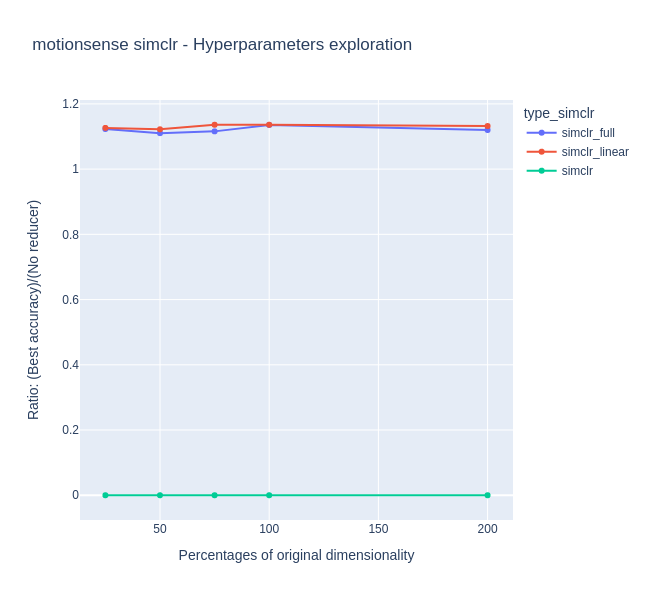

In [23]:
type_simclr=type_simclr_default
def plot_best_score_all(dataset, type_simclr):
    fig = go.Figure() 
    
    for percentage in percentages:
        best_scores = []  
        n_transformations_=0
        
        max_score = -1  
        for i, n_transformations in enumerate(transformations):
            data = read_csv(dataset, type_simclr, n_transformations, percentage)
            score_no_reducer = get_no_reducer_score(dataset) 
            try:
                max_dataset_score = data['score'].max()
                
                if max_dataset_score > max_score:
                    max_score = max_dataset_score 
                    max_dataset_score_ = data['score'].cummax()
                    n_transformations_ = n_transformations
            except:
                n_transformations_ = 0
                
                
                
            best_scores.append(max_score)
        best_transformation[percentage]={}
        best_transformation['score_no_reducer']=score_no_reducer        
        best_transformation[percentage]['t']=n_transformations_
        best_transformation[percentage]['score']=max_score
    return best_transformation


def plot_lines_all():
    data_frames = []
    
    for i, type_simclr in enumerate(type_simclr_options):
        best_scores = []
    
        for percentage in percentages:
            try:
                data = plot_best_score_all(dataset, type_simclr)
                score_no_reducer = get_no_reducer_score(dataset)
                best_scores.append(data[percentage]['score'].max() / score_no_reducer)
            except:
                print(dataset, type_simclr, percentage)
                best_scores.append(0)
    
            # Create a DataFrame for the current dataset and percentage
            df = pd.DataFrame({'type_simclr': [type_simclr], 'Percentage': [percentage], 'Best_Scores': [best_scores[-1]]})
            data_frames.append(df)
            
    # Concatenate all DataFrames into one
    data_frame = pd.concat(data_frames, ignore_index=True)
    
    # Create a Plotly figure
    fig = px.line(data_frame, x='Percentage', y='Best_Scores', color='type_simclr',
                  labels={'Percentage': 'Percentages of original dimensionality',
                          'Best_Scores': 'Ratio: (Best accuracy)/(No reducer)'},
                  title=f'{dataset} {type_simclr} - Hyperparameters exploration',
                  )
    fig.update_layout(
        height=600,  # Set your desired height (in pixels)
        width=800    # Set your desired width (in pixels)
    )
    fig.update_traces(mode='markers+lines')
    
    # Show the figure
    fig.show()


dataset=dataset_default
plot_lines_all()


experiments/simclr_all/simcrl_full/motionsense/simcrl_full_3T_motionsense_P25/data.csv
experiments/simclr_all/SimCLR_linear/motionsense/SimCLR_linear_3T_motionsense_P25/data.csv
experiments/simclr_all/simclr/motionsense/simclr_3T_motionsense_P25/data.csv


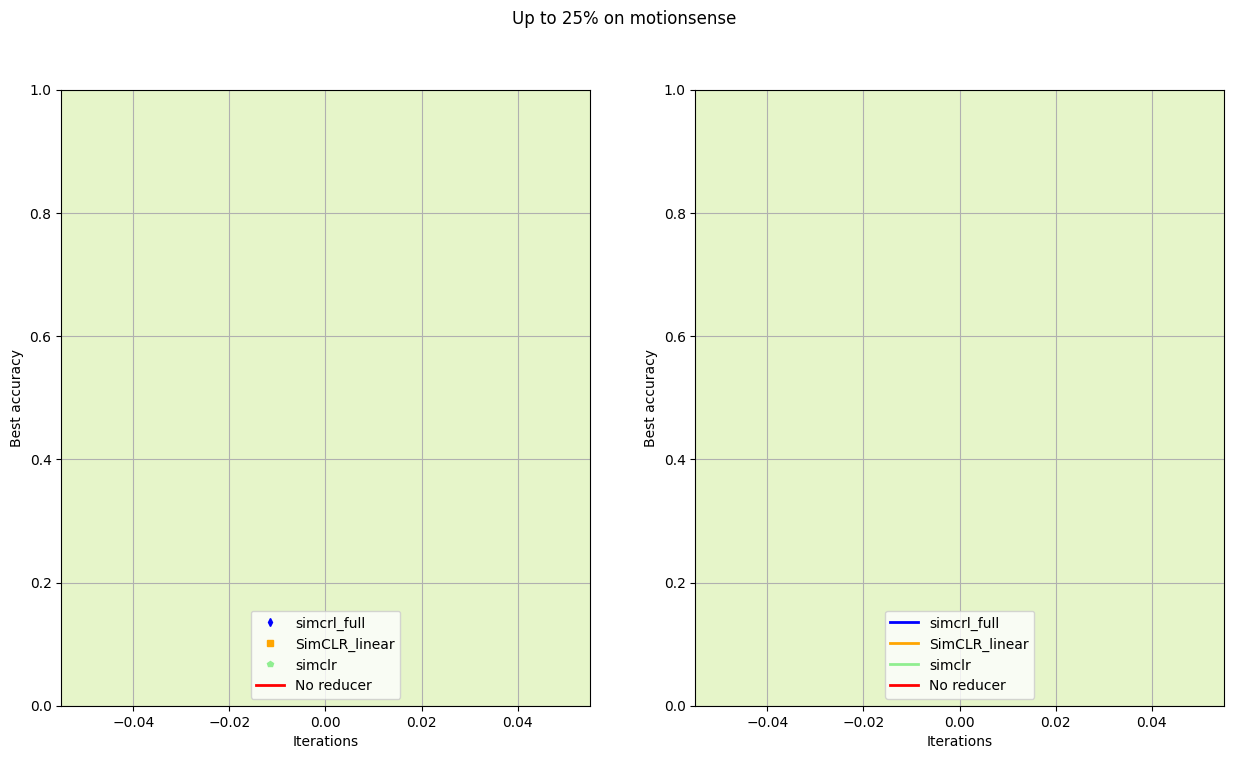

experiments/simclr_all/simcrl_full/motionsense/simcrl_full_3T_motionsense_P50/data.csv
experiments/simclr_all/SimCLR_linear/motionsense/SimCLR_linear_3T_motionsense_P50/data.csv
experiments/simclr_all/simclr/motionsense/simclr_3T_motionsense_P50/data.csv


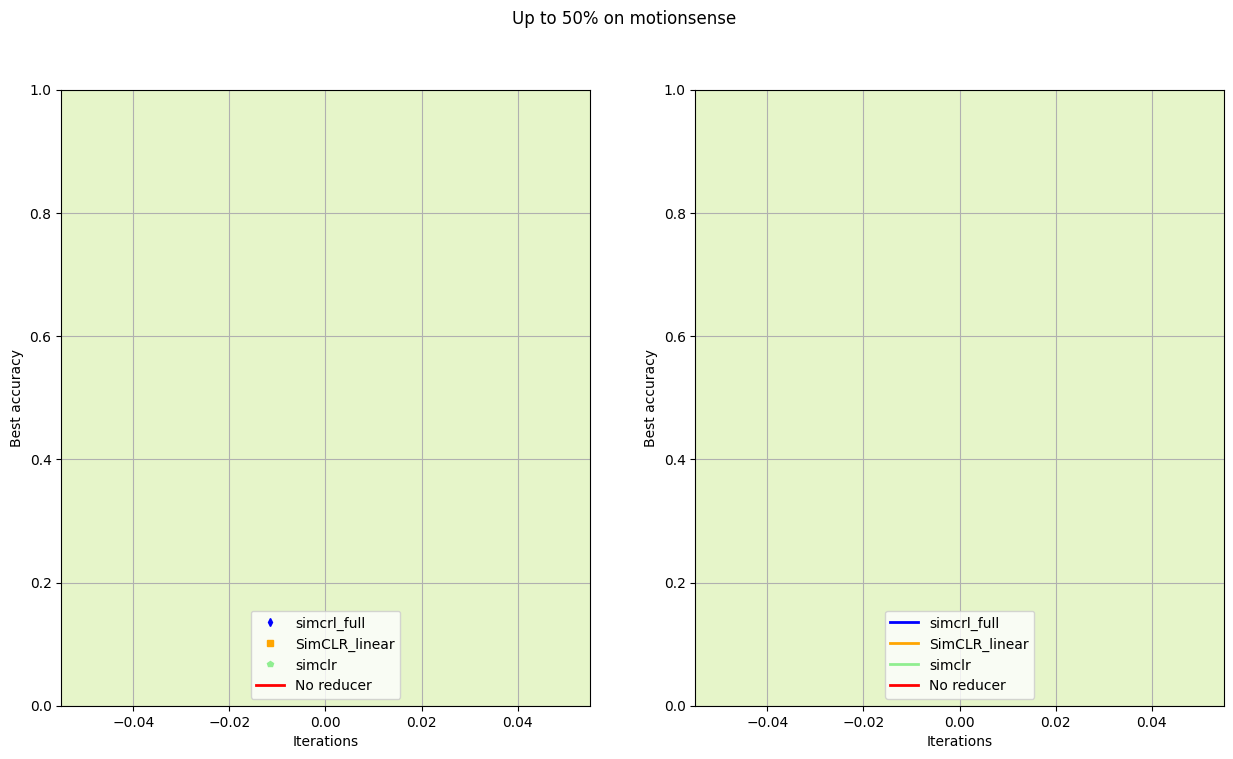

experiments/simclr_all/simcrl_full/motionsense/simcrl_full_3T_motionsense_P75/data.csv
experiments/simclr_all/SimCLR_linear/motionsense/SimCLR_linear_3T_motionsense_P75/data.csv
experiments/simclr_all/simclr/motionsense/simclr_3T_motionsense_P75/data.csv


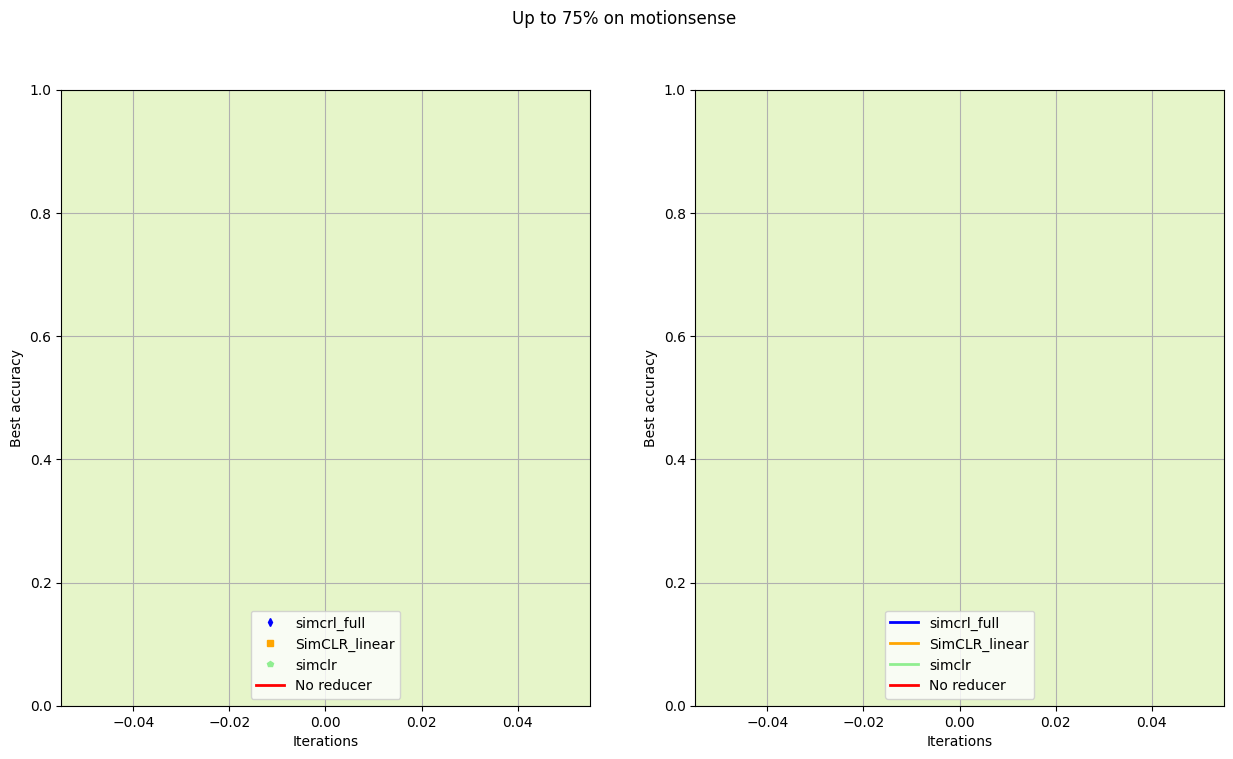

experiments/simclr_all/simcrl_full/motionsense/simcrl_full_3T_motionsense_P100/data.csv
experiments/simclr_all/SimCLR_linear/motionsense/SimCLR_linear_3T_motionsense_P100/data.csv
experiments/simclr_all/simclr/motionsense/simclr_3T_motionsense_P100/data.csv


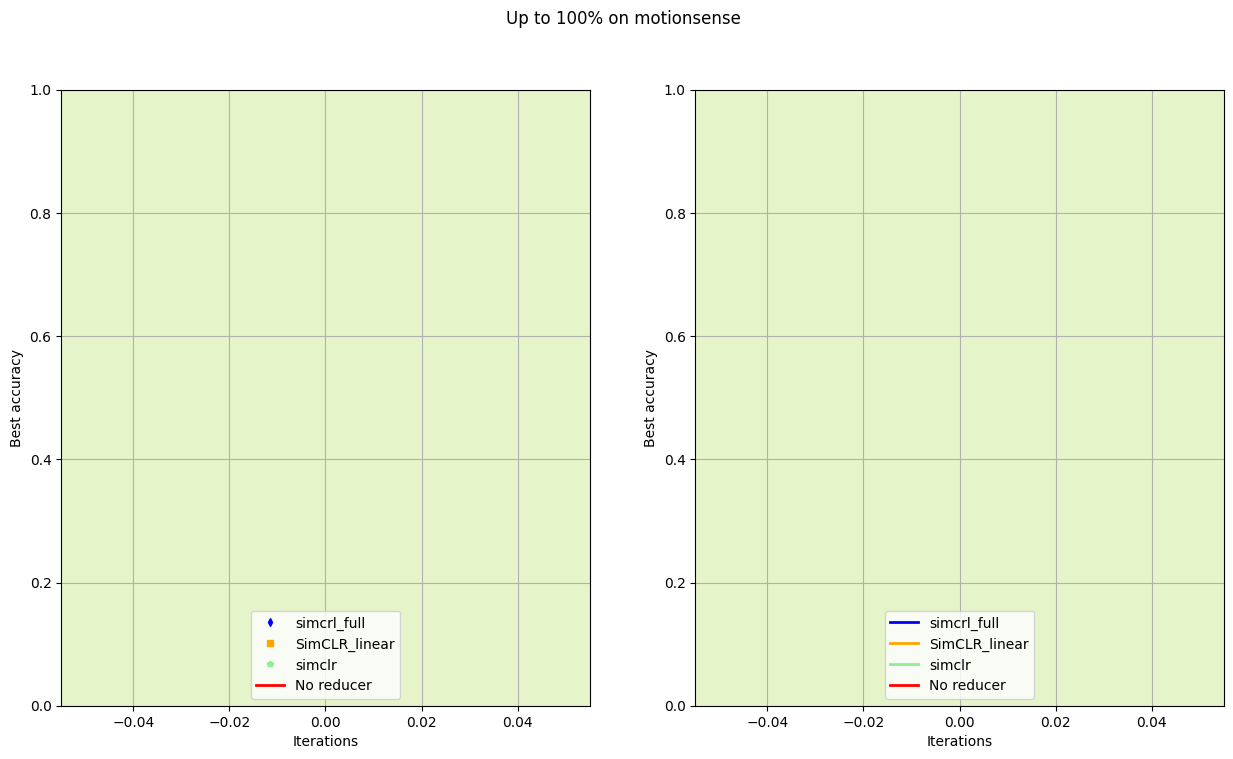

experiments/simclr_all/simcrl_full/motionsense/simcrl_full_3T_motionsense_P200/data.csv
experiments/simclr_all/SimCLR_linear/motionsense/SimCLR_linear_3T_motionsense_P200/data.csv
experiments/simclr_all/simclr/motionsense/simclr_3T_motionsense_P200/data.csv


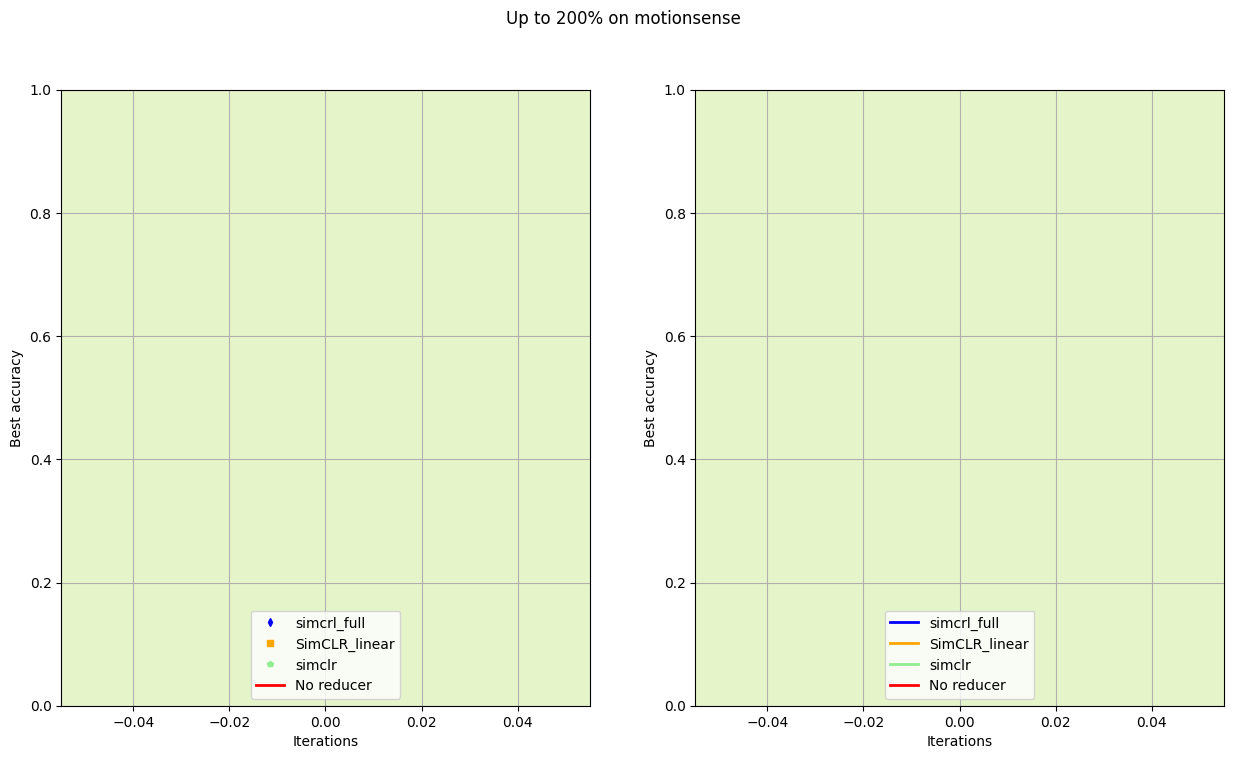

In [21]:
fixed_percentage(datasets=[dataset_default])

experiments/simclr_all/simclr_full/wisdm/simclr_full_2T_wisdm_P25/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_3T_wisdm_P25/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_4T_wisdm_P25/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_2T_wisdm_P50/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_3T_wisdm_P50/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_4T_wisdm_P50/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_2T_wisdm_P75/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_3T_wisdm_P75/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_4T_wisdm_P75/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_2T_wisdm_P100/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_3T_wisdm_P100/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_4T_wisdm_P100/data.csv
experiments/simclr_all/simclr_full/wisdm/simclr_full_1T_wisdm_P200/data.csv
experiments/simclr_al

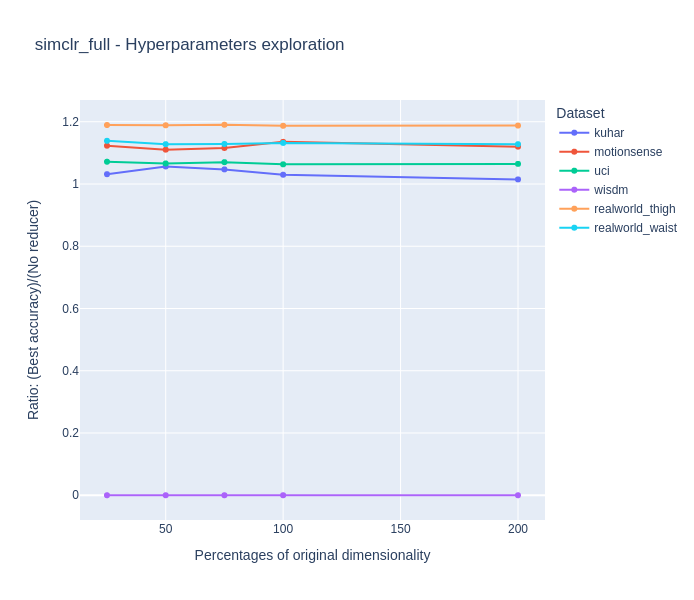

In [18]:
type_simclr=type_simclr_default
def plot_best_score_all(dataset, type_simclr):
    fig = go.Figure() 
    
    for percentage in percentages:
        best_scores = []  
        n_transformations_=0
        
        max_score = -1  
        for i, n_transformations in enumerate(transformations):
            data = read_csv(dataset, type_simclr, n_transformations, percentage)
            score_no_reducer = get_no_reducer_score(dataset) 
            try:
                max_dataset_score = data['score'].max()
                
                if max_dataset_score > max_score:
                    max_score = max_dataset_score 
                    max_dataset_score_ = data['score'].cummax()
                    n_transformations_ = n_transformations
            except:
                n_transformations_ = 0
                
                
                
            best_scores.append(max_score)
        best_transformation[percentage]={}
        best_transformation['score_no_reducer']=score_no_reducer        
        best_transformation[percentage]['t']=n_transformations_
        best_transformation[percentage]['score']=max_score
    return best_transformation


def plot_lines_all():
    data_frames = []
    
    for i, dataset in enumerate(datasets):
        best_scores = []
    
        for percentage in percentages:
            try:
                data = plot_best_score_all(dataset, type_simclr)
                score_no_reducer = get_no_reducer_score(dataset)
                best_scores.append(data[percentage]['score'].max() / score_no_reducer)
            except:
                print(dataset, type_simclr, percentage)
                best_scores.append(0)
    
            # Create a DataFrame for the current dataset and percentage
            df = pd.DataFrame({'Dataset': [dataset], 'Percentage': [percentage], 'Best_Scores': [best_scores[-1]]})
            data_frames.append(df)
            
    # Concatenate all DataFrames into one
    data_frame = pd.concat(data_frames, ignore_index=True)
    
    # Create a Plotly figure
    fig = px.line(data_frame, x='Percentage', y='Best_Scores', color='Dataset',
                  labels={'Percentage': 'Percentages of original dimensionality',
                          'Best_Scores': 'Ratio: (Best accuracy)/(No reducer)'},
                  title=f'{type_simclr} - Hyperparameters exploration',
                  )
    fig.update_layout(
        height=600,  # Set your desired height (in pixels)
        width=800    # Set your desired width (in pixels)
    )
    fig.update_traces(mode='markers+lines')
    
    # Show the figure
    fig.show()

plot_lines_all()